# Predictor de ventas del area Cosmetica por sectores para Stanhome

## Cargamos librerias

In [171]:
import sys, os
current_path = os.getcwd()
src_path = os.path.dirname(current_path)
root_path = os.path.dirname(src_path)
def get_root_path(n):
    '''
    Esta función nos permite iterar sobre carpetas para añadir el path de nuestra carpeta raíz
    Argumentos:
        - n (int): el número de veces que iteraremos para llegar a la carpeta deseada
    '''
    path = os.getcwd() # para notebook ||| __file__ --> para .py
    for i in range(n):
        path = os.path.dirname(path)
    print(path)
    sys.path.append(path)

get_root_path(n=2)
sys.path

/Users/richart_jennifer/Library/Mobile Documents/com~apple~CloudDocs/Data Science/Bootcamp/EDA ML


['/Users/richart_jennifer/Library/Mobile Documents/com~apple~CloudDocs/Data Science/Bootcamp/EDA ML/src/notebooks',
 '/Users/richart_jennifer/.vscode/extensions/ms-toolsai.jupyter-2021.8.2041215044/pythonFiles',
 '/Users/richart_jennifer/.vscode/extensions/ms-toolsai.jupyter-2021.8.2041215044/pythonFiles/lib/python',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Users/richart_jennifer/Library/Python/3.7/lib/python/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions',
 '/Users/richart_jennifer/.ipython',
 '/Users/richart_jennifer/Library/Mobile Documents/com~apple~CloudDocs/Data Science/Bootcamp/EDA ML',
 '/Users/richart_jennifer/Library/Mobile Documents/com~apple~Cl

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import pandas_profiling
import phik
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn import preprocessing, metrics, linear_model, model_selection
from sklearn.tree import DecisionTreeRegressor, plot_tree
from scipy.stats import shapiro, skew, iqr
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectKBest
import statsmodels as sm
import statsmodels.api as sm
#import xgboost as xg
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
#import lightgbm as lgb
import pickle
from src.utils.funciones import * 



%matplotlib inline

# Producto 1 - La Crème Essentielle

## Cargamos los datos

In [173]:
df_1 = pd.read_excel("../data/processed/df_1.xlsx")


In [174]:
df_1 = df_1[['REGION_ID','CICLO', 'YEAR', 'MONTH', 'ID_STANHOME', '%DTO.', 'PAGINA',
       'COD-MOV.', 'PVP','PVP_TOT_FACTURA', 'PROMO_ID']]

In [41]:
df_1.describe()

,REGION_ID,CICLO,YEAR,MONTH,ID_STANHOME,%DTO.,PAGINA,COD-MOV.,PVP,PVP_TOT_FACTURA,PROMO_ID
count,16582.000000,16582.000000,16582.000000,16582.0,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000,16582.000000
mean,2.865155,201930.777711,2019.216017,4.0,54965.130201,23.783187,109.007176,2204.346279,33.806070,267.341441,3.165903
std,1.373948,113.826583,1.136173,0.0,29545.223434,10.607380,196.365029,14.740306,14.497024,202.675142,1.325650
min,1.000000,201801.000000,2018.000000,4.0,33.000000,0.000000,0.000000,2200.000000,7.500000,23.950000,1.000000
25%,2.000000,201811.000000,2018.000000,4.0,27131.000000,20.000000,12.000000,2200.000000,24.950000,148.362500,1.000000
50%,3.000000,201911.000000,2019.000000,4.0,63195.000000,25.000000,70.000000,2200.000000,29.950000,215.650000,4.000000
75%,4.000000,202014.000000,2020.000000,4.0,80490.000000,30.000000,76.000000,2200.000000,39.950000,316.390000,4.000000
max,5.000000,202117.000000,2021.000000,4.0,99628.000000,52.000000,888.000000,2290.000000,59.950000,6343.820000,4.000000


In [42]:
df_1.dropna()

,REGION_ID,CICLO,YEAR,MONTH,ID_STANHOME,%DTO.,PAGINA,COD-MOV.,PVP,PVP_TOT_FACTURA,PROMO_ID
0,2,201801,2018,4,74214,25.0,10,2200,44.9,272.14,4
1,4,201801,2018,4,25322,30.0,10,2200,44.9,370.40,4
2,4,201801,2018,4,22770,20.0,64,2200,59.9,143.60,4
3,4,201801,2018,4,24420,20.0,64,2200,59.9,131.40,4
4,4,201801,2018,4,9469,30.0,64,2200,59.9,313.88,4
...,...,...,...,...,...,...,...,...,...,...,...
16577,5,202117,2021,4,11282,20.0,15,2200,39.0,148.85,3
16578,4,202117,2021,4,78217,25.0,15,2200,39.0,307.56,3
16579,4,202117,2021,4,61465,20.0,15,2200,39.0,118.85,3
16580,2,202117,2021,4,21785,30.0,15,2200,39.0,478.78,3


In [175]:
X1 = df_1.drop(['PVP'], axis=1)     
y1 = df_1['PVP']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42)

In [44]:
print("Total features shape X1:", X1.shape)
print("Train features shape X1_train:", X1_train.shape)
print("Train target shape y1_train:", y1_train.shape)
print("Test features shape X1_test:", X1_test.shape)
print("Test target shape y1_test:", y1_test.shape)

Total features shape X1: (16582, 10)
Train features shape X1_train: (13265, 10)
Train target shape y1_train: (13265,)
Test features shape X1_test: (3317, 10)
Test target shape y1_test: (3317,)


In [45]:
df_1.columns

Index(['REGION_ID', 'CICLO', 'YEAR', 'MONTH', 'ID_STANHOME', '%DTO.', 'PAGINA',
       'COD-MOV.', 'PVP', 'PVP_TOT_FACTURA', 'PROMO_ID'],
      dtype='object')

## Regresion Linear 

In [148]:
lm = LinearRegression(n_jobs=-1)
lm.fit(X1_train, y1_train)
predictions = lm.predict(X1_test)
print(predictions)
print('SCORE:', lm.score(X1_test, y1_test))
print('MAE:', metrics.mean_absolute_error(y1_test, predictions))
print('MSE:', metrics.mean_squared_error(y1_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions)))
print('SQRT:', np.sqrt(metrics.mean_squared_error(y1_test, predictions))/y1.mean())


[42.0084829  38.9665449  34.37105355 ... 30.48727333 32.84339076
 38.48391861]
SCORE: 0.10424543240413742
MAE: 10.273570119130198
MSE: 184.9967045599376
RMSE: 13.601349365409948
SQRT: 0.4023345343570392


In [149]:
print(f"Intercept:{lm.intercept_}")
print(f"Coef:{(lm.coef_)}")
coeff_df_1 = pd.DataFrame(lm.coef_,
                        X1.columns,
                        columns=['Coefficient'])
coeff_df_1

Intercept:1232.2837323415988
Coef:[ 2.57782397e-01 -8.92988036e-02  8.42317214e+00  1.59414149e-13
 -7.31541443e-06  3.25698114e-01 -1.91348181e-03 -8.54035413e-02
  2.53565856e-03  1.63306206e+00]


,Coefficient
REGION_ID,2.577824e-01
CICLO,-8.929880e-02
YEAR,8.423172e+00
MONTH,1.594141e-13
ID_STANHOME,-7.315414e-06
%DTO.,3.256981e-01
PAGINA,-1.913482e-03
COD-MOV.,-8.540354e-02
PVP_TOT_FACTURA,2.535659e-03
PROMO_ID,1.633062e+00


### Visualizamos las predicciones

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


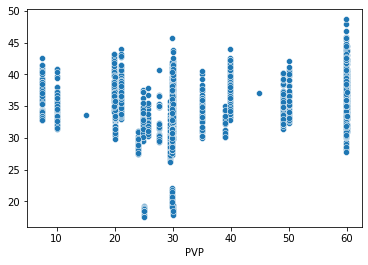

In [25]:
sns.scatterplot(y1_test, predictions);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PVP', ylabel='Density'>

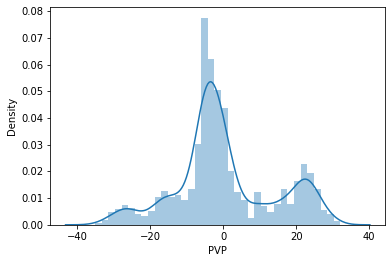

In [26]:
sns.distplot((y1_test - predictions))

In [50]:
intercept = lm.intercept_
features = pd.DataFrame(lm.coef_, X1_train.columns, columns=['coefficient'])
features.head().sort_values('coefficient', ascending=False)

,coefficient
YEAR,8.423172e+00
REGION_ID,2.577824e-01
MONTH,1.594141e-13
ID_STANHOME,-7.315414e-06
CICLO,-8.929880e-02


### Verificamos si escalando nos va mejor

In [28]:
std_scale = preprocessing.StandardScaler().fit(X1_train)
X1_train_scal = std_scale.transform(X1_train)

lm_scal = LinearRegression()
lm_scal.fit(X1_train_scal, y1_train)



LinearRegression()

In [29]:
std_scale = preprocessing.StandardScaler().fit(X1_test)
X1_test_scal = std_scale.transform(X1_test)

lm_scal = LinearRegression()
lm_scal.fit(X1_test_scal, y1_test)

LinearRegression()

In [30]:
intercept_scal = lm_scal.intercept_
features_std = pd.DataFrame(lm_scal.coef_, X1_train.columns, columns=['coefficient'])

features_std.sort_values('coefficient', ascending=False)

,coefficient
%DTO.,3.425446e+00
YEAR,3.416529e+00
PROMO_ID,2.674904e+00
PVP_TOT_FACTURA,9.367873e-01
REGION_ID,8.651114e-02
SEGMENTO_ID,0.000000e+00
MONTH,-7.771561e-15
ID_STANHOME,-6.734510e-01
PAGINA,-7.217826e-01
COD-MOV.,-8.769877e-01


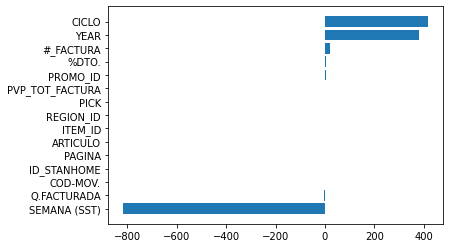

In [266]:
features_std = features_std.sort_values('coefficient', ascending=True)
plt.barh(features_std.index, features_std.coefficient);

In [31]:
lm = LinearRegression(n_jobs=-1)
model_lm = lm.fit(X1_train_scal, y1_train)
predictions_scal = lm.predict(X1_test_scal)
print('SCORE:', lm.score(X1_test_scal, y1_test))
print('MAE:', metrics.mean_absolute_error(y1_test, predictions_scal))
print('MSE:', metrics.mean_squared_error(y1_test, predictions_scal))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions_scal)))
print('SQRT:', np.sqrt(metrics.mean_squared_error(y1_test, predictions_scal))/y1.mean())


SCORE: 0.10485967431171728
MAE: 10.261893297879425
MSE: 184.8698475694007
RMSE: 13.596685168429866
SQRT: 0.40219656514018315


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


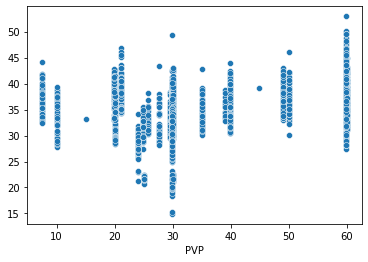

In [269]:
sns.scatterplot(y1_test, predictions_scal);

No mejora mucho

### Probamos un predecir el precio de un producto nuevo

In [51]:
variable_prueba = X1_train.iloc[2]
variable_prueba.array

<PandasArray>
[3.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]
Length: 10, dtype: float64

In [52]:
variable_prueba


REGION_ID               3.0
CICLO              202115.0
YEAR                 2021.0
MONTH                   4.0
ID_STANHOME         24954.0
%DTO.                  18.0
PAGINA                 10.0
COD-MOV.             2200.0
PVP_TOT_FACTURA        71.0
PROMO_ID                4.0
Name: 16124, dtype: float64

In [150]:
new_price1= [[1.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 1:", lm.predict(new_price1))

new_price2= [[2.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 2:",lm.predict(new_price2))

new_price3= [[3.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 3:",lm.predict(new_price3))

new_price4= [[4.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 4:",lm.predict(new_price4))

new_price5= [[5.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 5:",lm.predict(new_price5))

Precio zona 1: [31.63009909]
Precio zona 2: [31.88788148]
Precio zona 3: [32.14566388]
Precio zona 4: [32.40344628]
Precio zona 5: [32.66122867]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/

## Decision Tree Regressor

In [151]:
dtr = DecisionTreeRegressor(max_depth=13)
dtr.fit(X1_train, y1_train)
predictions_dtr = dtr.predict(X1_train)
print('MAE_train:', metrics.mean_absolute_error(y1_train, predictions_dtr))
print('MSE_train:', metrics.mean_squared_error(y1_train,predictions_dtr))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y1_train, predictions_dtr)))
print('r2_SCORE_train:', r2_score(y1_train, predictions_dtr))


MAE_train: 1.0615457023475146
MSE_train: 16.551639145525435
RMSE_train: 4.068370576228944
r2_SCORE_train: 0.9215769598612268


In [152]:
predictions_dtr = dtr.predict(X1_test)
print('MAE_test:', metrics.mean_absolute_error(y1_test, predictions_dtr))
print('MSE_test:', metrics.mean_squared_error(y1_test,predictions_dtr))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y1_test, predictions_dtr)))
print('r2_SCORE_test:', r2_score(y1_test, predictions_dtr))

MAE_test: 1.2286520781300465
MSE_test: 22.04158681824141
RMSE_test: 4.694846836505043
r2_SCORE_test: 0.8932745741797599


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


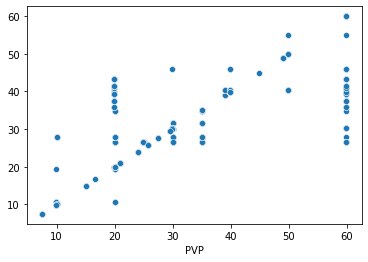

In [275]:
sns.scatterplot(y1_train, predictions_dtr);

In [248]:
X1_train.iloc[1]

REGION_ID                3.0
CICLO               201914.0
SEMANA (SST)       2019095.0
YEAR                  2019.0
#_FACTURA          3422092.0
ID_STANHOME          33510.0
ITEM_ID                  1.0
ARTICULO              3599.0
PICK                     2.0
%DTO.                   30.0
PAGINA                  10.0
COD-MOV.              2200.0
PVP.ART.                59.9
Q.FACTURADA              2.0
PVP_TOT_FACTURA        223.0
PROMO_ID                 1.0
Name: 8657, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


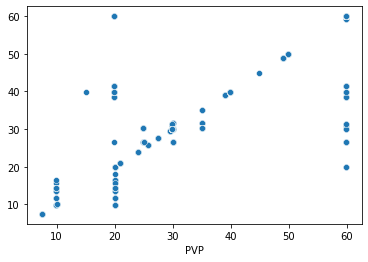

In [67]:
sns.scatterplot(y1_test, predictions_dtr);

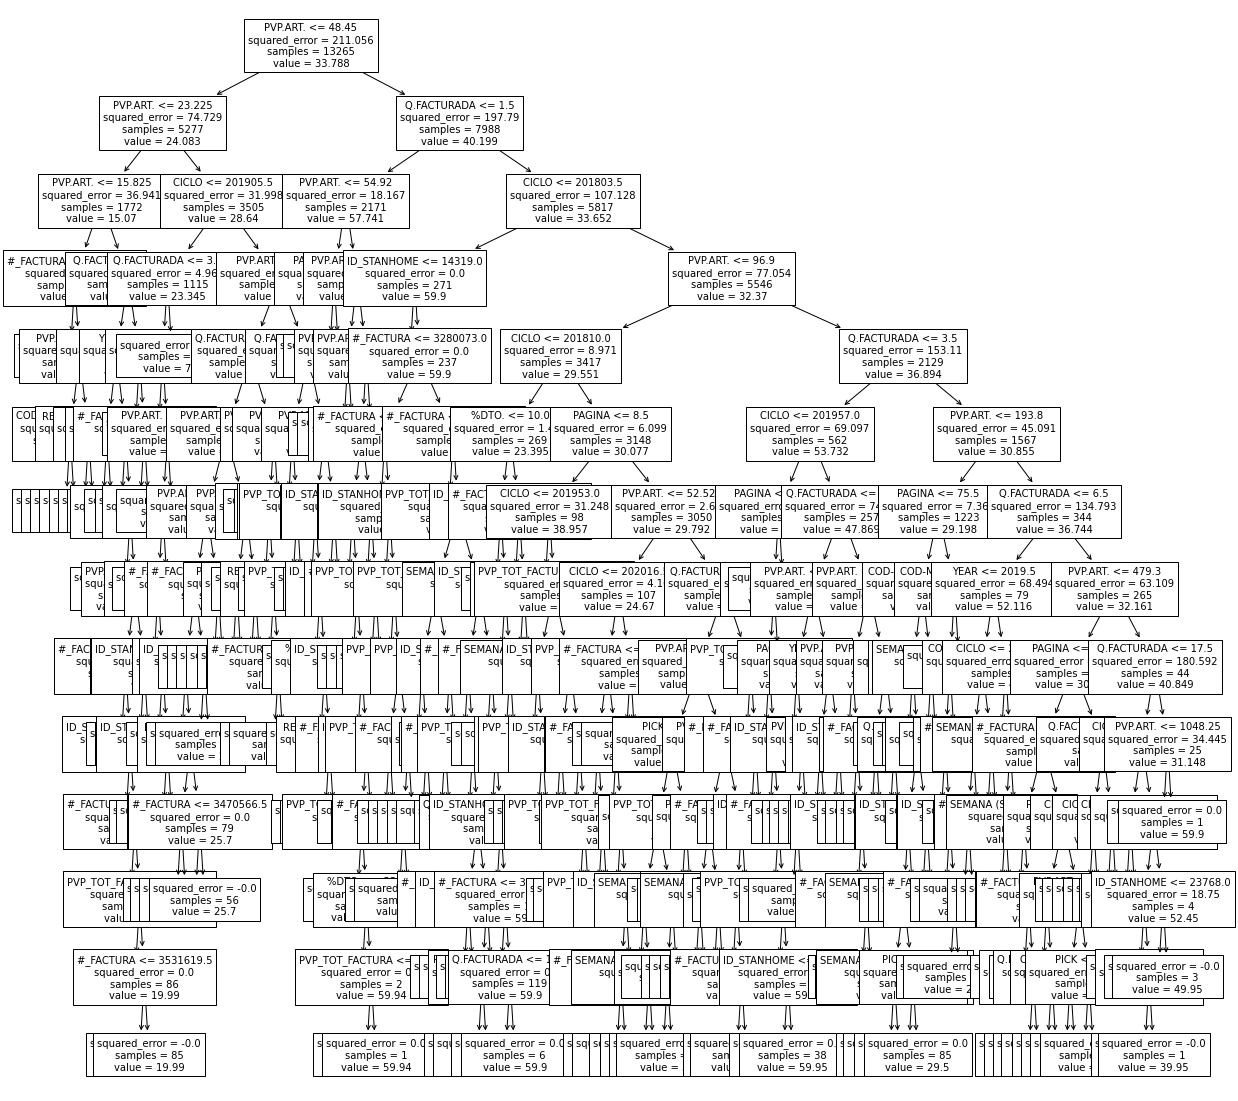

In [203]:
labels = np.array(df_1['PVP'])
features = df_1.drop('PVP', axis=1)
features_list = features.columns
features = np.array(features)
plt.figure(figsize = (20, 20))
plot_tree(dtr,
          feature_names = features_list,
          class_names = 'PVP',
          fontsize = 10
        #   max_depth=2
          );

In [153]:
new_price1= [[1.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 1:", dtr.predict(new_price1))

new_price2= [[2.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 2:", dtr.predict(new_price2))

new_price3= [[3.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 3:", dtr.predict(new_price3))

new_price4= [[4.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 4:", dtr.predict(new_price4))

new_price5= [[5.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 5:", dtr.predict(new_price5))

Precio zona 1: [49.]
Precio zona 2: [49.]
Precio zona 3: [49.]
Precio zona 4: [49.]
Precio zona 5: [49.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


## Ada Boost Regresor

In [68]:
modelo_ada = AdaBoostRegressor(base_estimator=None, 
                                n_estimators=3, 
                                learning_rate=1.1, 
                                loss='exponential', 
                                random_state=42)
modelo_ada.fit(X1_train, y1_train)
predicciones_ada= modelo_ada.predict(X1_train)
print('MAE_train:', metrics.mean_absolute_error(y1_train, predicciones_ada))
print('MSE_train:', metrics.mean_squared_error(y1_train,predicciones_ada))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y1_train, predicciones_ada)))
print('r2_SCORE_train:', r2_score(y1_train, predicciones_ada))

MAE_train: 6.6727585954600075
MSE_train: 93.45232363805488
RMSE_train: 9.667074202573128
r2_SCORE_train: 0.557215133601431


In [69]:
predicciones_ada= modelo_ada.predict(X1_test)
print('MAE_test:', metrics.mean_absolute_error(y1_test, predicciones_ada))
print('MSE_test:', metrics.mean_squared_error(y1_test,predicciones_ada))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y1_test, predicciones_ada)))
print('r2_SCORE_test:', r2_score(y1_test, predicciones_ada))
predictions_dtr

MAE_test: 6.494782448067685
MSE_test: 88.2675092981966
RMSE_test: 9.395078993717753
r2_SCORE_test: 0.5726084699062677


array([29.97, 59.9 , 59.95, ..., 59.94, 29.95, 59.9 ])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


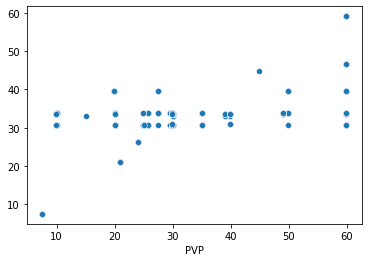

In [70]:
sns.scatterplot(y1_test, predicciones_ada);

## Gradient Boosting Regressor

In [71]:
modelo_gbr = GradientBoostingRegressor(
            n_estimators = 10000,
            loss         = 'ls',
            max_features = 'auto',
            random_state = 42)
modelo_gbr.fit(X1_train, y1_train)
predicciones_gbr= modelo_gbr.predict(X1_train)
print('MAE_train:', metrics.mean_absolute_error(y1_train, predicciones_gbr))
print('MSE_train:', metrics.mean_squared_error(y1_train,predicciones_gbr))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y1_train, predicciones_gbr)))
print('r2_SCORE_train:', r2_score(y1_train, predicciones_gbr))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


MAE_train: 0.7190380400331904
MSE_train: 11.941793119972692
RMSE_train: 3.45568996294122
r2_SCORE_train: 0.9434187929701379


In [74]:
predicciones_gbr= modelo_gbr.predict(X1_test)
print('MAE_test:', metrics.mean_absolute_error(y1_test, predicciones_gbr))
print('MSE_test:', metrics.mean_squared_error(y1_test,predicciones_gbr))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y1_test, predicciones_gbr)))
print('r2_SCORE_test:', r2_score(y1_test, predicciones_gbr))

MAE_test: 1.7531740536532578
MSE_test: 45.47985354945499
RMSE_test: 6.7438752620029225
r2_SCORE_test: 0.779786420263956


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


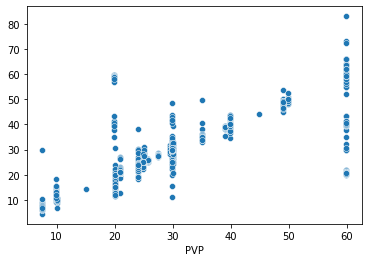

In [73]:
sns.scatterplot(y1_test, predicciones_gbr);

## Random Forest Regressor

In [154]:
rndf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
rndf.fit(X1_train, y1_train)
predicciones_rf = rndf.predict(X1_train)
print('MAE_train:', metrics.mean_absolute_error(y1_train, predicciones_rf))
print('MSE_train:', metrics.mean_squared_error(y1_train,predicciones_rf))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y1_train, predicciones_rf)))
print('r2_SCORE_train:', r2_score(y1_train, predicciones_rf))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:391: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


MAE_train: 0.7433295411020319
MSE_train: 12.675027081943334
RMSE_train: 3.560200427215206
r2_SCORE_train: 0.939944669596304


In [156]:
predicciones_rf = rndf.predict(X1_test)
print('MAE_test:', metrics.mean_absolute_error(y1_test, predicciones_rf))
print('MSE_test:', metrics.mean_squared_error(y1_test, predicciones_rf))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y1_test, predicciones_rf)))
print('r2_SCORE_test:', r2_score(y1_test, predicciones_rf))

MAE_test: 1.245411829545313
MSE_test: 31.978250467213122
RMSE_test: 5.65493151746448
r2_SCORE_test: 0.8451612206397437


In [98]:
names = df_1.columns
scores = sorted(zip(map(lambda x: round(x, 4), rndf.feature_importances_), names), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature'])

,Score,Feature
0,0.4323,CICLO
1,0.3495,PAGINA
2,0.0722,PVP_TOT_FACTURA
3,0.0539,%DTO.
4,0.0366,YEAR
5,0.0213,PVP
6,0.0199,ID_STANHOME
7,0.0093,COD-MOV.
8,0.0050,REGION_ID
9,0.0000,MONTH


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


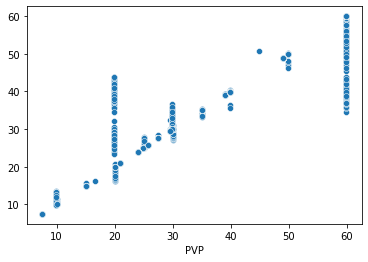

In [90]:
sns.scatterplot(y1_train, predicciones_rf );

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


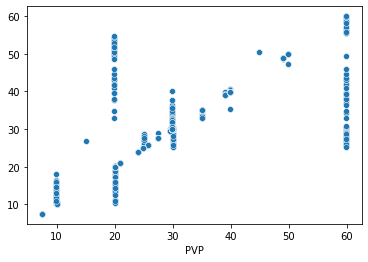

In [100]:
sns.scatterplot(y1_test, predicciones_rf );

In [157]:
new_price1= [[1.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 1:", rndf.predict(new_price1))

new_price2= [[2.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 2:", rndf.predict(new_price2))

new_price3= [[3.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 3:", rndf.predict(new_price3))

new_price4= [[4.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 4:", rndf.predict(new_price4))

new_price5= [[5.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 5:", lm.predict(new_price5))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Precio zona 1: [48.793151]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Precio zona 2: [48.795957]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Precio zona 3: [48.812766]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Precio zona 4: [48.815236]
Precio zona 5: [32.66122867]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## Resultados Modelos

In [ ]:
res_modelos = pd.read_excel("Resultado_modelos.xlsx", index_col =0)
res_modelos

,Linear Regression,Decision Tree Regressor,Ada Boost Regresor,Gradient Boosting Regressor,Random Forest Regressor
Medicion,,,,,
MAE,8.0466,0.0352,3.0584,0.0032,0.0419
MSE,125.2977,0.7597,26.9330,0.1484,0.3927
RMSE,11.1936,0.8716,5.1897,0.3852,0.6266
SCORE,0.3933,0.9963,0.8695,0.9992,0.9980


# Producto 2 - All Purpose

## Cargamos los datos

In [158]:
df_2 = pd.read_excel("../data/processed/df_2.xlsx")
df_2 = df_2[['REGION_ID','CICLO', 'YEAR', 'MONTH', 'ID_STANHOME', '%DTO.', 'PAGINA',
       'COD-MOV.', 'PVP','PVP_TOT_FACTURA', 'PROMO_ID']]
df_2.dropna()
X2 = df_2.drop(['PVP'], axis=1)     
y2 = df_2['PVP']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20, random_state = 42)


## Regresion Linear

SCORE: 0.04996726625332748
MAE: 2.5077332487701702
MSE: 10.754789695669238
RMSE: 3.2794496025505926
SQRT: 0.3187023038457993


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


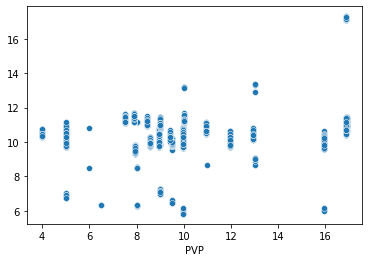

In [159]:
lm = LinearRegression(n_jobs=-1)
lm.fit(X2_train, y2_train)
predictions = lm.predict(X2_test)
print('SCORE:', lm.score(X2_test, y2_test))
print('MAE:', metrics.mean_absolute_error(y2_test, predictions))
print('MSE:', metrics.mean_squared_error(y2_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions)))
print('SQRT:', np.sqrt(metrics.mean_squared_error(y2_test, predictions))/y2.mean())
sns.scatterplot(y2_test, predictions);

In [160]:
new_price1= [[1.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 1:", lm.predict(new_price1))

new_price2= [[2.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 2:",lm.predict(new_price2))

new_price3= [[3.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 3:",lm.predict(new_price3))

new_price4= [[4.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 4:",lm.predict(new_price4))

new_price5= [[5.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 5:",lm.predict(new_price5))

Precio zona 1: [11.08154511]
Precio zona 2: [11.10153492]
Precio zona 3: [11.12152473]
Precio zona 4: [11.14151454]
Precio zona 5: [11.16150435]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/

## Decision Tree Regresor

MAE_test: 0.827537285172174
MSE_test: 3.559708177135421
RMSE_test: 1.886718891922011
r2_SCORE_test: 0.6855504025126447


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


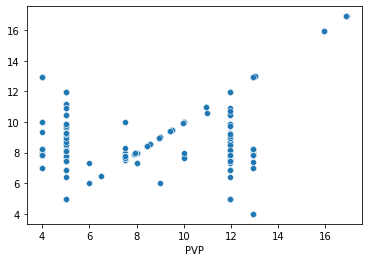

In [161]:
model_dtr = DecisionTreeRegressor(max_depth=13)
model_dtr.fit(X2_train, y2_train)
predictions_dtr = model_dtr.predict(X2_test)
print('MAE_test:', metrics.mean_absolute_error(y2_test, predictions_dtr))
print('MSE_test:', metrics.mean_squared_error(y2_test,predictions_dtr))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y2_test, predictions_dtr)))
print('r2_SCORE_test:', r2_score(y2_test, predictions_dtr))
sns.scatterplot(y2_test, predictions_dtr);

### Guardamos el modelo

In [141]:
with open('../model/dtr.pkl','wb') as f:
    pickle.dump(model_dtr,f)

In [162]:
new_price1= [[1.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 1:", model_dtr.predict(new_price1))

new_price2= [[2.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 2:", model_dtr.predict(new_price2))

new_price3= [[3.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 3:", model_dtr.predict(new_price3))

new_price4= [[4.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 4:", model_dtr.predict(new_price4))

new_price5= [[5.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 5:", model_dtr.predict(new_price5))

Precio zona 1: [9.]
Precio zona 2: [9.]
Precio zona 3: [9.]
Precio zona 4: [9.]
Precio zona 5: [9.]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


## Ada Boost Regresor

MAE_test: 1.4931300072792997
MSE_test: 4.654688712708925
RMSE_test: 2.1574727605948874
r2_SCORE_test: 0.5888244430985625


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


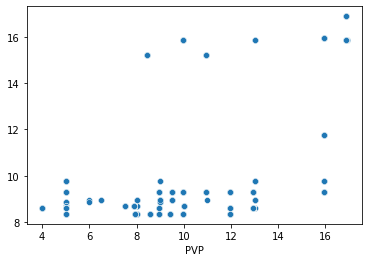

In [167]:
modelo_ada = AdaBoostRegressor(base_estimator=None, 
                                n_estimators=3, 
                                learning_rate=1.1, 
                                loss='exponential', 
                                random_state=42)
modelo_ada.fit(X2_train, y2_train)
predicciones_ada= modelo_ada.predict(X2_test)
print('MAE_test:', metrics.mean_absolute_error(y2_test, predicciones_ada))
print('MSE_test:', metrics.mean_squared_error(y2_test,predicciones_ada))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y2_test, predicciones_ada)))
print('r2_SCORE_test:', r2_score(y2_test, predicciones_ada))
predictions_dtr
sns.scatterplot(y2_test, predicciones_ada);

In [168]:
new_price1= [[1.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 1:", modelo_ada.predict(new_price1))

new_price2= [[2.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 2:", modelo_ada.predict(new_price2))

new_price3= [[3.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 3:", modelo_ada.predict(new_price3))

new_price4= [[4.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 4:", modelo_ada.predict(new_price4))

new_price5= [[5.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 5:", modelo_ada.predict(new_price5))

Precio zona 1: [8.70512063]
Precio zona 2: [8.70512063]
Precio zona 3: [8.70512063]
Precio zona 4: [8.70512063]
Precio zona 5: [8.70512063]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Framewo

## Gradient Boosting Regresor

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


MAE_test: 1.3107072236607034
MSE_test: 6.018422105074136
RMSE_test: 2.4532472572234
r2_SCORE_test: 0.46835799052143245


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


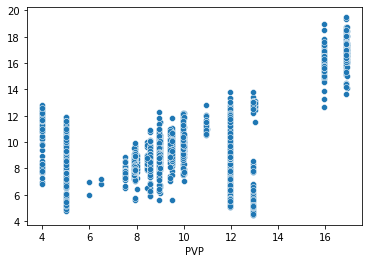

In [163]:
modelo_gbr = GradientBoostingRegressor(
            n_estimators = 10000,
            loss         = 'ls',
            max_features = 'auto',
            random_state = 42)
modelo_gbr.fit(X2_train, y2_train)
predicciones_gbr= modelo_gbr.predict(X2_test)
print('MAE_test:', metrics.mean_absolute_error(y2_test, predicciones_gbr))
print('MSE_test:', metrics.mean_squared_error(y2_test,predicciones_gbr))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y2_test, predicciones_gbr)))
print('r2_SCORE_test:', r2_score(y2_test, predicciones_gbr))
sns.scatterplot(y2_test, predicciones_gbr);

In [164]:
new_price1= [[1.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 1:", modelo_gbr.predict(new_price1))

new_price2= [[2.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 2:", modelo_gbr.predict(new_price2))

new_price3= [[3.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 3:", modelo_gbr.predict(new_price3))

new_price4= [[4.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 4:", modelo_gbr.predict(new_price4))

new_price5= [[5.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 5:", modelo_gbr.predict(new_price5))

Precio zona 1: [9.51754799]
Precio zona 2: [9.60627541]
Precio zona 3: [9.62287205]
Precio zona 4: [9.6166375]
Precio zona 5: [9.59658257]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feat

## Random Forest Regresor

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:391: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


MAE_test: 1.0659179147114373
MSE_test: 5.66640966541986
RMSE_test: 2.380422161176429
r2_SCORE_test: 0.4994532838577823


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


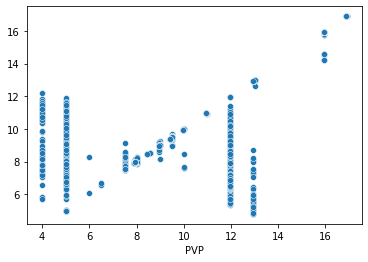

In [176]:
modelo_rndf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
modelo_rndf.fit(X2_train, y2_train)
predicciones_rf = modelo_rndf.predict(X2_test)
print('MAE_test:', metrics.mean_absolute_error(y2_test, predicciones_rf))
print('MSE_test:', metrics.mean_squared_error(y2_test, predicciones_rf))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y2_test, predicciones_rf)))
print('r2_SCORE_test:', r2_score(y2_test, predicciones_rf))
sns.scatterplot(y2_test, predicciones_rf );

In [177]:
new_price1= [[1.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 1:", modelo_rndf.predict(new_price1))

new_price2= [[2.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 2:", modelo_rndf.predict(new_price2))

new_price3= [[3.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 3:", modelo_rndf.predict(new_price3))

new_price4= [[4.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 4:", modelo_rndf.predict(new_price4))

new_price5= [[5.0, 202115.0, 2021.0, 4.0, 24954.0, 18.0, 10.0, 2200.0, 71.0, 4.0]]
print("Precio zona 5:", modelo_rndf.predict(new_price5))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Precio zona 1: [8.98875]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Precio zona 2: [8.98875]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Precio zona 3: [8.991375]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Precio zona 4: [8.99229167]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


Precio zona 5: [8.990125]
